<h1 style="font-size:35px;color:deeppink;"> Data Analysis -Case Study 1</h1>

In this case study we take two datasets of wine samples that are pretty much that clean. We merge these datasets into one and then perform our data analysis to answer some questions.

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1:Asking Questions
Q1)Dependance of quality on various factors<br>
Q2)Comparision b/w White and Red Wine<br>
Q3)Is Alcohol Content Dependant on Quality?<br>
Q4)Do sweeter wines have higher Quality?<br>
Q5)Level of acidity with the highest quality<br>

## Step 2  :Data Wrangling

### Gathering 

In [7]:
a=pd.read_csv('winequality-red.csv',sep=';')
b=pd.read_csv('winequality-white.csv', sep=";")

### Assessing

In [10]:
a.shape

(1599, 12)

In [11]:
b.shape

(4898, 12)

In [13]:
a.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [14]:
b.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [15]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [16]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [17]:
a.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [18]:
b.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [21]:
sum(a.duplicated())

240

In [22]:
sum(b.duplicated())

937

In [23]:
a.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [24]:
b.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


###  Cleaning

As we have seen almost all our data is pretty clean and there is not much need to clean it. There is even no need to drop duplicates as its not that significant.But we will combine these two dataframes into one to make our analysis simpler

First we will add a new column describing the color

In [26]:
red_color=np.repeat('red',1599)

In [27]:
white_color=np.repeat('white',4898)

In [29]:
a['color']=red_color
b['color']=white_color

In [30]:
a.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [31]:
b.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [32]:
wine_quality=a.append(b,ignore_index=True)


In [36]:
wine_quality.shape

(6497, 13)

In [39]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


## Step 3 :Exploratory Data Analysis and Visualisations

### Histograms 

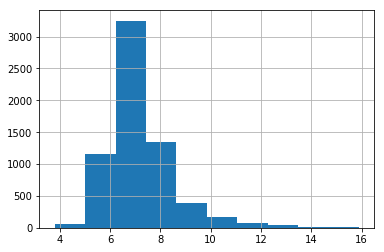

In [40]:
wine_quality['fixed acidity'].hist()

115.7445744189626

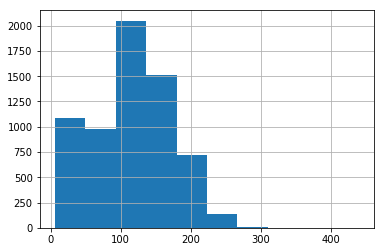

In [42]:
wine_quality['total sulfur dioxide'].hist()
wine_quality['total sulfur dioxide'].mean()

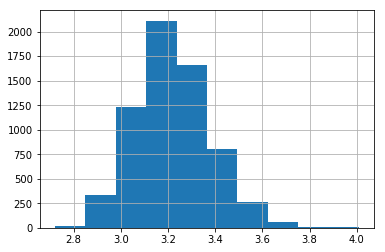

In [44]:
wine_quality['pH'].hist()

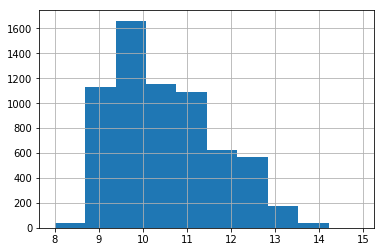

In [45]:
wine_quality['alcohol'].hist()

### Scatterplots

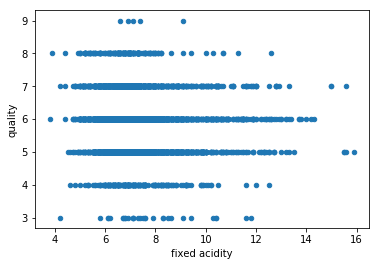

In [48]:
wine_quality.plot(y='quality',x='fixed acidity',kind='scatter');

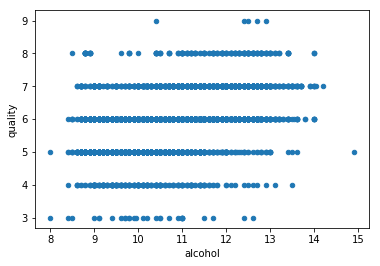

In [49]:
wine_quality.plot(y='quality',x='alcohol',kind='scatter');

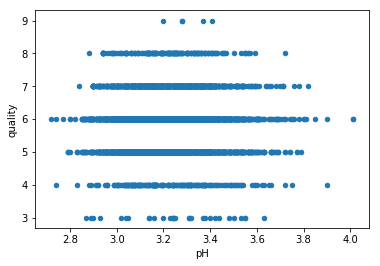

In [54]:
wine_quality.plot(y='quality',x='pH',kind='scatter');

### Is there certain quality of wine assoiciated with higher quallity?

In [62]:
wine_quality.groupby(['color'])['quality'].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

### What level of acid recieves the highest ratings

In [64]:
wine_quality['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [67]:
bin_edges=[2.72,3.11,3.21,3.32,4.01]
bin_names=['High','Moderately High','Okaish','Low']
wine_quality['acidity_leves']=pd.cut(wine_quality['pH'],bins=bin_edges,labels=bin_names)

In [68]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_leves
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Moderately High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Okaish
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Moderately High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low


In [74]:
wine_quality.groupby('acidity_leves',as_index=False)['quality'].mean()

,acidity_leves,quality
0,High,5.783343
1,Moderately High,5.784540
2,Okaish,5.850832
3,Low,5.859593


### Do wines with higher alcoholic content receive better ratings?


In [73]:
wine_quality['alcohol'].median()

10.3

In [82]:
low_alcohol=wine_quality.query('alcohol<10.3')

In [84]:
high_alcohol=wine_quality.query('alcohol>10.3')

In [85]:
low_alcohol['quality'].mean()

5.475920679886686

In [86]:
high_alcohol['quality'].mean()

6.161773891317926

### Do sweeter wines receive better ratings?

In [87]:
wine_quality['residual sugar'].median()

3.0

In [101]:
low_sugar=wine_quality[wine_quality['residual sugar']<3.0]

In [106]:
high_sugar=wine_quality[wine_quality['residual sugar']>=3.0]

In [104]:
low_sugar['alcohol'].mean()

10.72746617085014

In [107]:
high_sugar['alcohol'].mean()

10.259234454638152

### Which color wine is better?

In [113]:
wine_quality.groupby('color')['quality'].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

TypeError: 'str' object is not callable

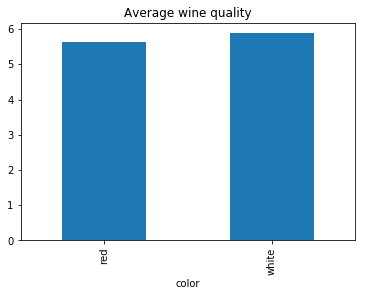

In [121]:
wine_quality.groupby('color')['quality'].mean().plot(kind='bar',title='Average wine quality')


## Step 4: Drawing Conclusions

This was my first project in Data Analysis. I learnt how the basic overflow data analysis process work. I learnt various new functions of Pandas,numpy,matplotlib,how the whole process of Data Analysis work,I learnt how we can plot histogrms,scatterplots. I also learnt how powerfull pandas is to perform Data Analysis.